# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [40]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

records = 1

print('Beginning Data Retrieval')
print('------------------------------')

for citi in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={citi}&appid={weather_api_key}"
    response = requests.get(url).json()
    time.sleep(1.1)

    try:
        city.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f"processing record {records} | {citi}")
        records += 1
    except KeyError:
        print('city not found, skipping to next!')

Beginning Data Retrieval
------------------------------
processing record 1 | arraial do cabo
processing record 2 | chuy
processing record 3 | tiksi
city not found, skipping to next!
processing record 4 | la rioja
processing record 5 | punta arenas
processing record 6 | gizo
processing record 7 | cabo san lucas
processing record 8 | port lincoln
processing record 9 | nelson bay
processing record 10 | saint-denis
processing record 11 | shelburne
processing record 12 | busselton
processing record 13 | albany
processing record 14 | ilulissat
processing record 15 | atuona
processing record 16 | vaini
processing record 17 | avarua
processing record 18 | tasiilaq
processing record 19 | port elizabeth
processing record 20 | clarksburg
processing record 21 | kaspiyskiy
processing record 22 | barrow
processing record 23 | cayenne
city not found, skipping to next!
processing record 24 | thanh hoa
processing record 25 | ushuaia
processing record 26 | benicarlo
processing record 27 | dikson
proces

processing record 225 | tabou
processing record 226 | sikonge
processing record 227 | alencon
processing record 228 | lima
processing record 229 | ancud
processing record 230 | dingle
processing record 231 | ishigaki
processing record 232 | vila do maio
processing record 233 | marawi
processing record 234 | tuatapere
processing record 235 | beloha
processing record 236 | westport
processing record 237 | saint-pierre
processing record 238 | beringovskiy
processing record 239 | fishers
processing record 240 | camocim
processing record 241 | kodiak
processing record 242 | shalya
processing record 243 | necochea
processing record 244 | kenai
processing record 245 | rapid valley
processing record 246 | brookhaven
processing record 247 | upata
processing record 248 | yellowknife
processing record 249 | olafsvik
processing record 250 | porto velho
processing record 251 | maraba
processing record 252 | warrnambool
processing record 253 | hofn
processing record 254 | ponta do sol
processing rec

processing record 444 | karratha
processing record 445 | hami
processing record 446 | lata
processing record 447 | sambava
processing record 448 | tessalit
processing record 449 | anadyr
processing record 450 | kibala
processing record 451 | dali
processing record 452 | gafanha da encarnacao
processing record 453 | portland
city not found, skipping to next!
processing record 454 | mackenzie
processing record 455 | haines junction
processing record 456 | ipora
processing record 457 | severo-kurilsk
processing record 458 | miquelon
processing record 459 | siatista
processing record 460 | vanavara
processing record 461 | vinogradnyy
processing record 462 | galich
processing record 463 | coquimbo
city not found, skipping to next!
processing record 464 | nouakchott
processing record 465 | berga
processing record 466 | axim
processing record 467 | staryy nadym
processing record 468 | villanueva
processing record 469 | jiaohe
processing record 470 | pacifica
processing record 471 | margate
pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Create the DataFrame

weather_dict = {"City": city,
                "Lat": lat,
                "Lng": lng,
                "Max Temp (F)": max_temp,
                "Humidity": humidity,
                "Cloudiness": cloudiness,
                "Country": country,
                "Wind Speed": wind_speed,
                "Date": date}

In [8]:
#Export to a .csv

weather_data_df = pd.DataFrame(weather_dict)

weather_data_df.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Country,Wind Speed,Date
0,Arraial do Cabo,-22.97,-42.03,297.15,88,75,BR,2.60,1608841118
1,Chui,-33.70,-53.46,296.88,71,8,UY,6.76,1608841130
2,Tiksi,71.69,128.87,244.25,88,100,RU,4.72,1608841131
3,La Rioja,42.25,-2.50,281.15,70,75,ES,5.70,1608841134
4,Punta Arenas,-53.15,-70.92,286.15,53,75,CL,18.50,1608841074


In [9]:
weather_data_df.to_csv("../output_data/WeatherDataCities.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.
hum_100 = weather_data_df.loc[weather_data_df['Humidity']>100]

hum_100.shape[0]


0

In [13]:
print(f"There are {hum_100.shape[0]} cities with humidity greater than 100.")

There are 0 cities with humidity greater than 100.


In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
print(f" Since we have {hum_100.shape[0]} cities with humidity greater than 100, there is no need to clean the DataFrame.")

 Since we have 0 cities with humidity greater than 100, there is no need to clean the DataFrame.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

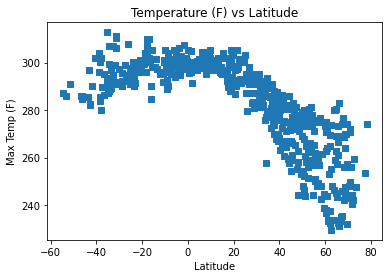

In [19]:
# Now we can use plt.scatter to create our graphs "Latitude Vs Temperature"
plt.scatter(weather_data_df["Lat"],weather_data_df["Max Temp (F)"],marker ="s")
plt.title("Temperature (F) vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("../output_data/Latitude vs Temperature (F)")
plt.show()

## Latitude vs. Humidity Plot

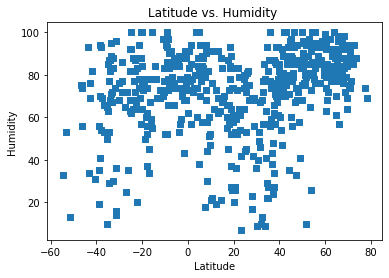

In [20]:
# Now we can use plt.scatter to create our graphs "Latitude vs. Humidity "
plt.scatter(weather_data_df["Lat"],weather_data_df["Humidity"],marker ="s")
plt.title("Latitude vs. Humidity ")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("../output_data/Latitude vs Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

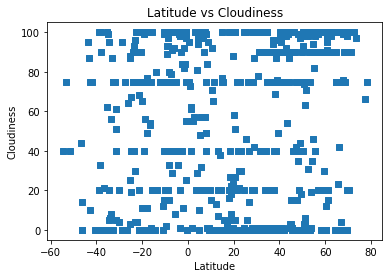

In [21]:
# Now we can use plt.scatter to create our graphs "Latitude vs. Cloudiness"
plt.scatter(weather_data_df["Lat"],weather_data_df["Cloudiness"],marker ="s")
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("../output_data/Latitude vs Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

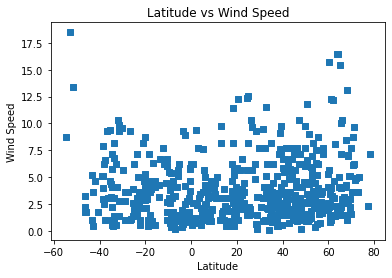

In [22]:
# Now we can use plt.scatter to create our graphs "Latitude Vs Temperature"
plt.scatter(weather_data_df["Lat"],weather_data_df["Wind Speed"],marker ="s")
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("../output_data/Latitude vs Wind Speed")
plt.show()

## Linear Regression

In [31]:
northen_hemisphere = weather_data_df.loc[pd.to_numeric(weather_data_df['Lat']).astype(float)>0, :]
southern_hemisphere = weather_data_df.loc[pd.to_numeric(weather_data_df['Lat']).astype(float)<0, :]


In [32]:
len(northen_hemisphere)

396

In [33]:
len(southern_hemisphere)

182

In [34]:
len(northen_hemisphere) + len(southern_hemisphere)

578

In [36]:
northen_hemisphere.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Country,Wind Speed,Date
2,Tiksi,71.69,128.87,244.25,88,100,RU,4.72,1608841131
3,La Rioja,42.25,-2.50,281.15,70,75,ES,5.70,1608841134
6,Cabo San Lucas,22.89,-109.91,301.48,61,75,MX,2.60,1608840918
9,Arrondissement de Saint-Denis,48.92,2.33,277.59,86,97,FR,6.20,1608841141
10,Shelburne,44.08,-80.20,274.82,93,100,CA,5.53,1608841142


In [37]:
southern_hemisphere.head()

,City,Lat,Lng,Max Temp (F),Humidity,Cloudiness,Country,Wind Speed,Date
0,Arraial do Cabo,-22.97,-42.03,297.15,88,75,BR,2.60,1608841118
1,Chui,-33.70,-53.46,296.88,71,8,UY,6.76,1608841130
4,Punta Arenas,-53.15,-70.92,286.15,53,75,CL,18.50,1608841074
5,Gizo Government Station,-8.10,156.84,301.57,74,80,SB,3.20,1608841136
7,Port Lincoln,-34.73,135.87,287.37,85,0,AU,5.74,1608841138


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Max Temp and average Latitiude on the Northern Hemisphere is -0.84.


ValueError: Format ' latitude linear regression' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff)

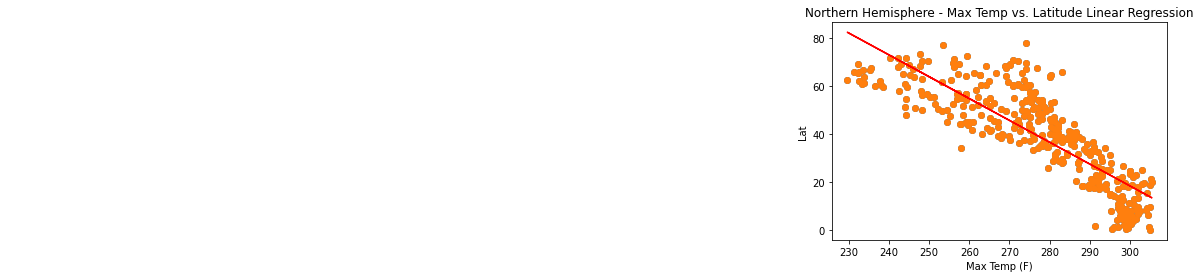

In [41]:

plt.scatter(northen_hemisphere['Max Temp (F)'],northen_hemisphere['Lat'])
x = northen_hemisphere['Max Temp (F)']
y = northen_hemisphere['Lat']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between Max Temp and average Latitiude on the Northern Hemisphere is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="blue")

# Add labels and title to plot
plt.xlabel("Max Temp (F)")
plt.ylabel("Lat")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig("../output_data/Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression